In [8]:
import keras
import numpy as np
# import cv2
import matplotlib.pyplot as plt
from time import time
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model


keras.__version__

'2.3.1'

In [17]:
# inception = InceptionV3(weights='full_retina_model.h5')
from keras.metrics import top_k_categorical_accuracy 
def top_2_accuracy(in_gt, in_pred): 
    return top_k_categorical_accuracy(in_gt, in_pred, k=2) 
# model.compile("adam", loss='categorical_crossentropy', metrics = ['categorical_accuracy', top_2_accuracy])
model = load_model('full_retina_model.h5', custom_objects={'top_2_accuracy': top_2_accuracy})

/usr/local/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
inception_v3 (Model)            (None, 14, 14, 2048) 21802784    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 14, 14, 2048) 8192        inception_v3[1][0]               
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 14, 14, 2048) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [39]:
IMG_SIZE = (512, 512, 3)
inp = Input(IMG_SIZE)
layer_outputs = [layer.get_output_at(-1) for layer in model.layers[:50]]
test_image = 'sample/16_left.jpeg'

img = image.load_img(test_image, target_size=(IMG_SIZE[0], IMG_SIZE[1]))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [40]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [52]:
layer_names = ['conv2d_1', 'activation_1', 'conv2d_4', 'activation_4', 'conv2d_9', 'activation_9']
activ_list = [activations[1], activations[4], activations[5], activations[6], activations[7], activations[8]]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/site-packages/matplotlib/tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.7/site-packages/matplotlib/tight_bbox.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.7/site-packages/matplotlib/patches.py:745: RuntimeWarning: invalid value encountered in double_scalars
  self._y1 = self._y0 + self._height


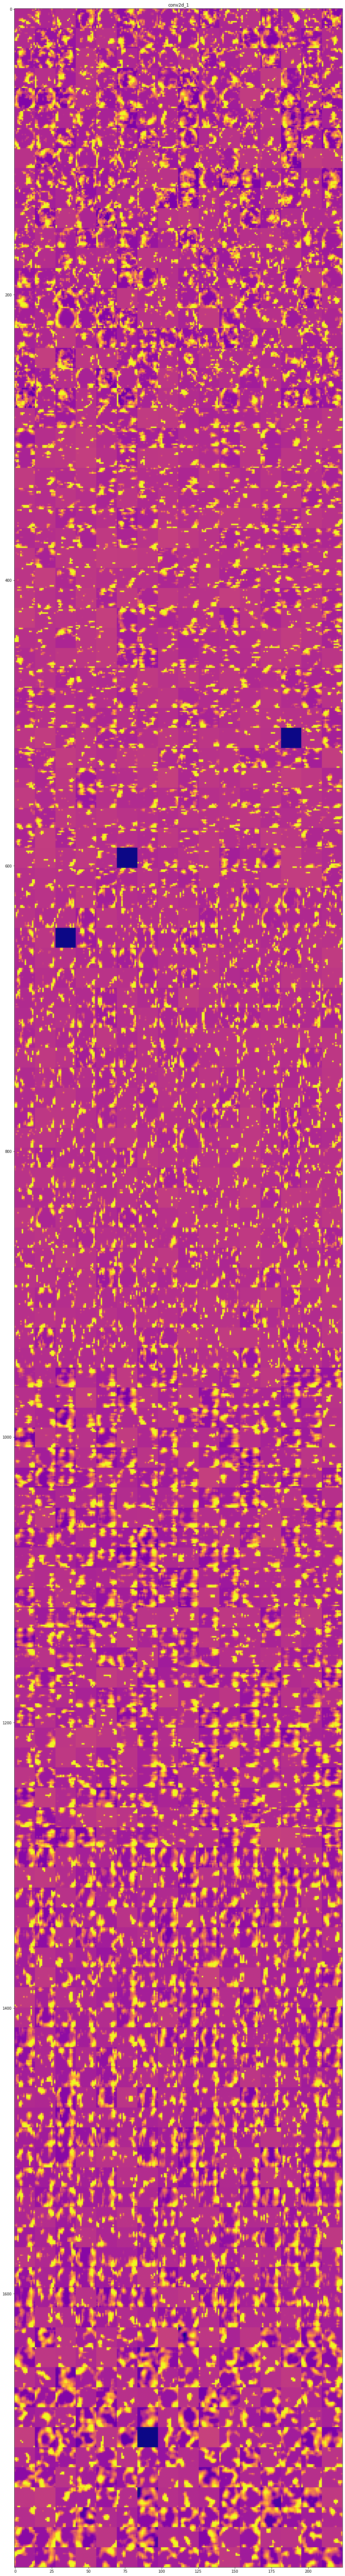

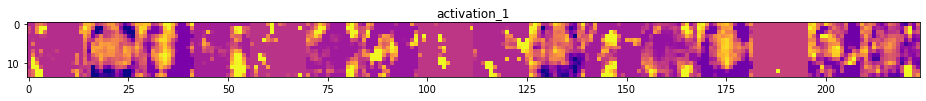

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

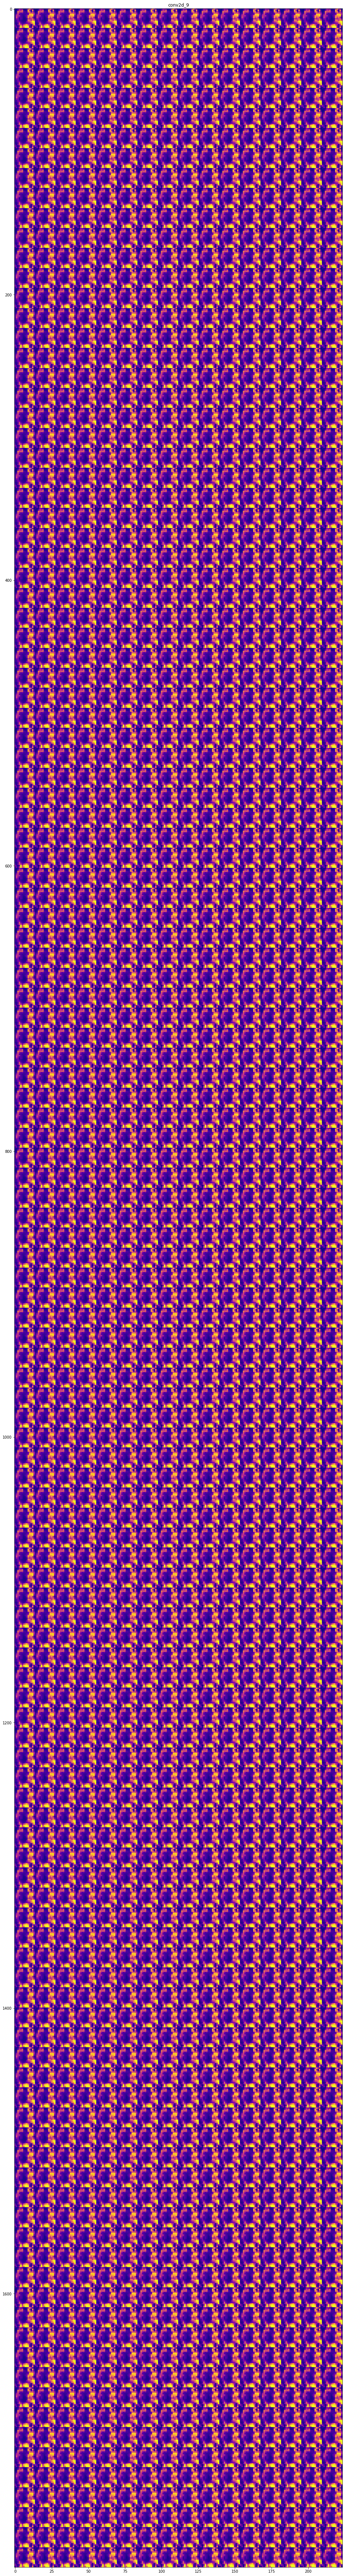

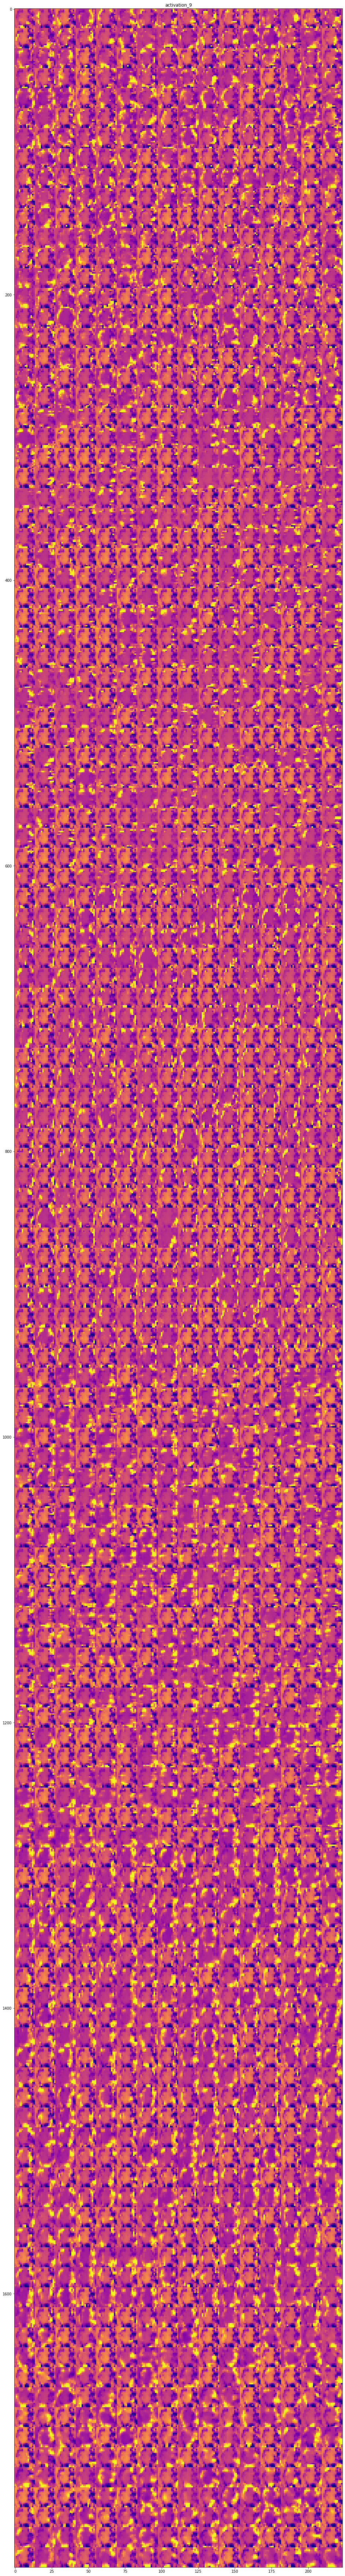

In [53]:

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')

In [ ]:
#what convnets learn

img_path = 'sample/16_left.jpeg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(512, 512))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

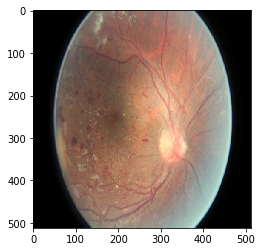

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

In [43]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.get_output_at(-1) for layer in model.layers[1:]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# layer_outputs = [layer.get_output_at(0) for layer in model.layers[:50]]

In [44]:
activations = activation_model.predict(img_tensor)

In [45]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 14, 14, 2048)


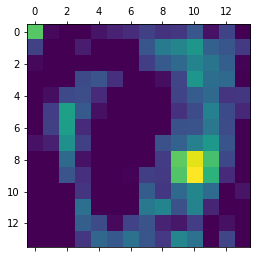

In [46]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

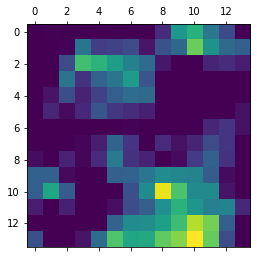

In [47]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


IndexError: too many indices for array

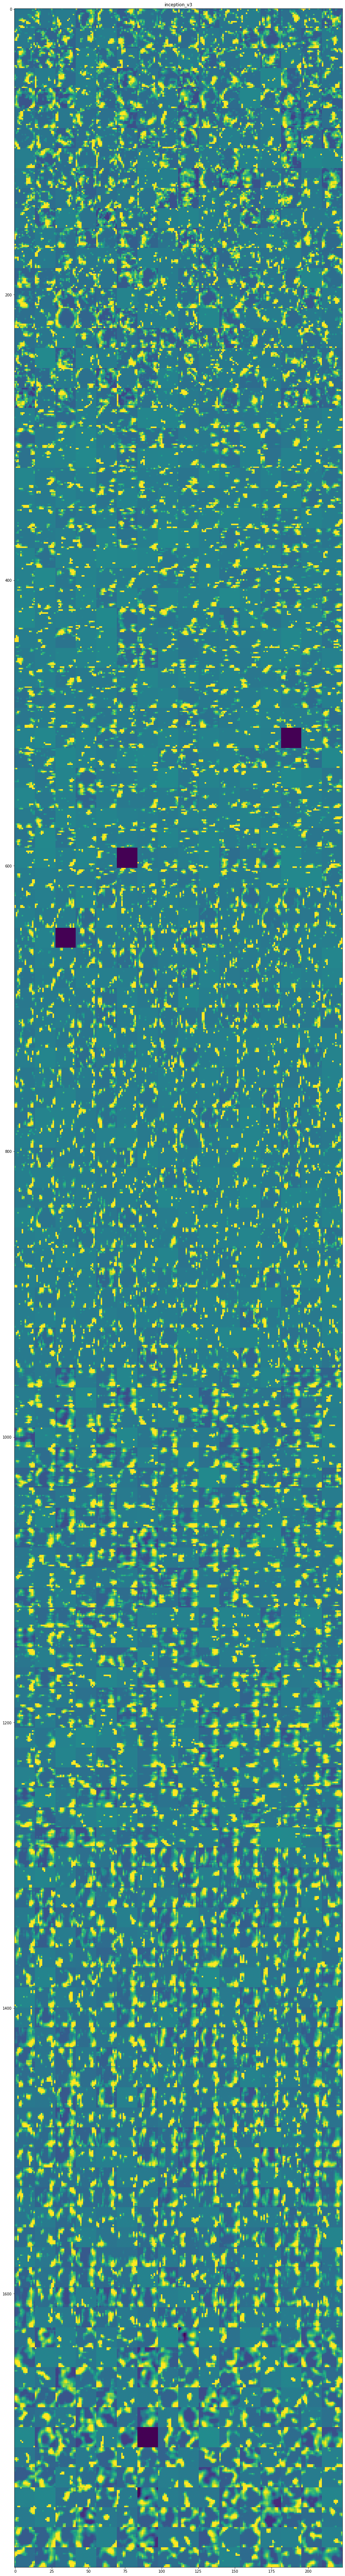

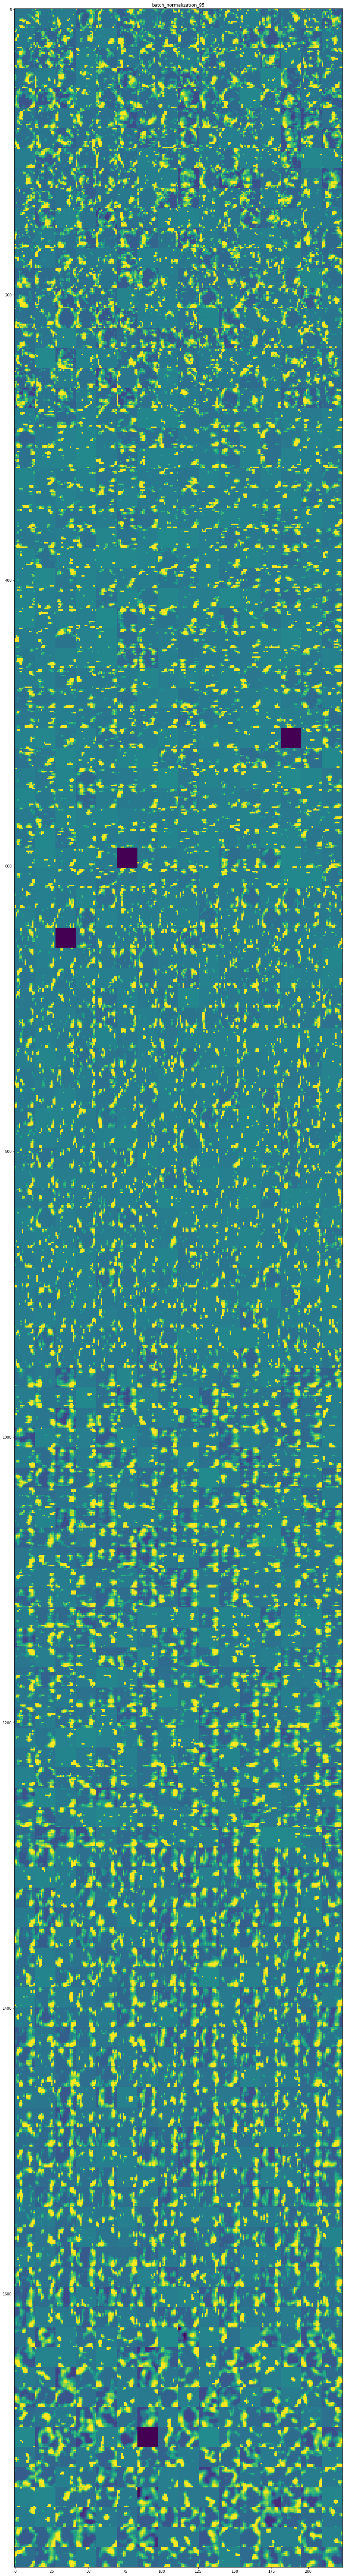

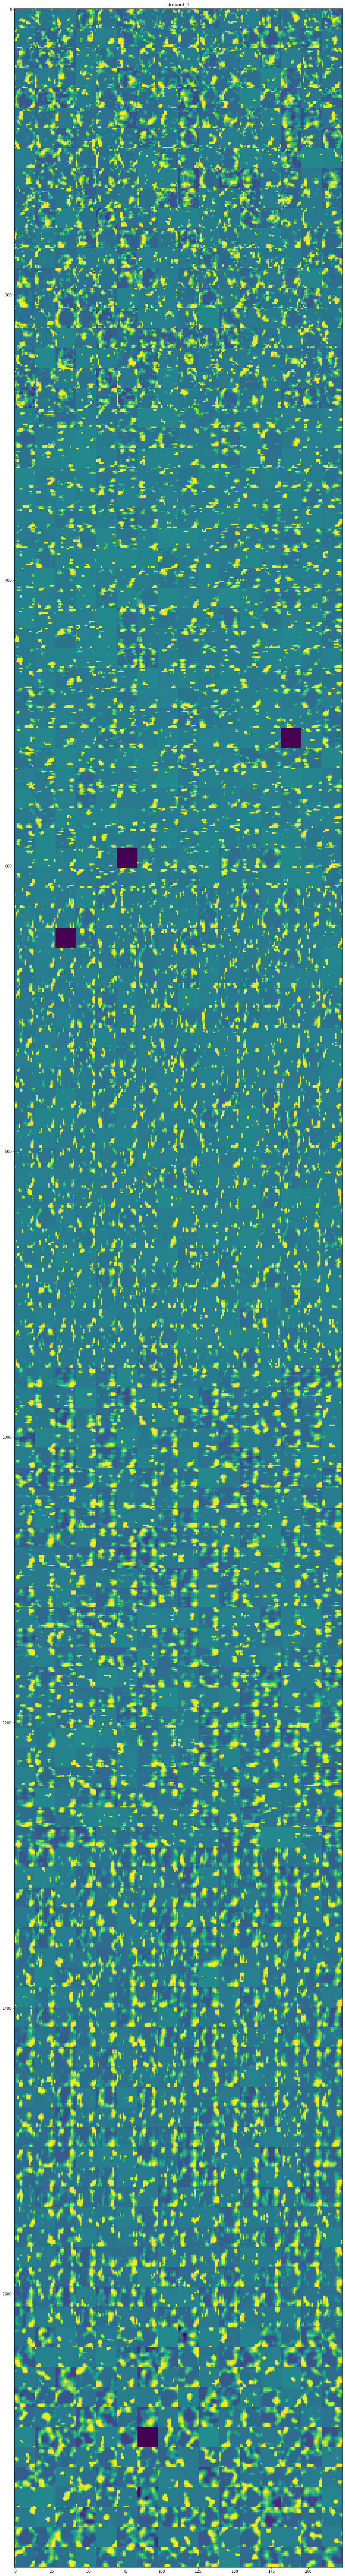

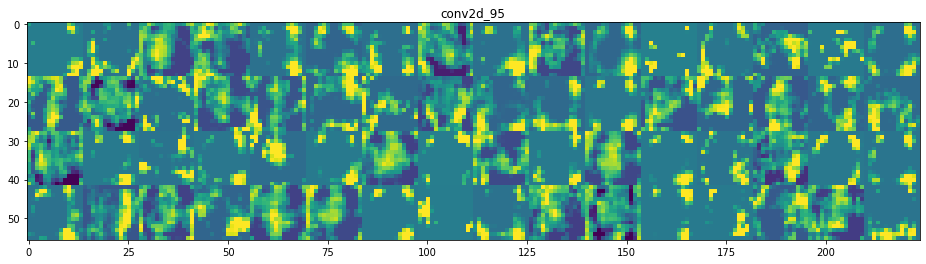

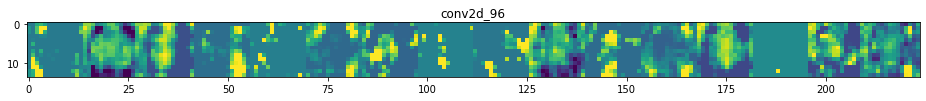

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

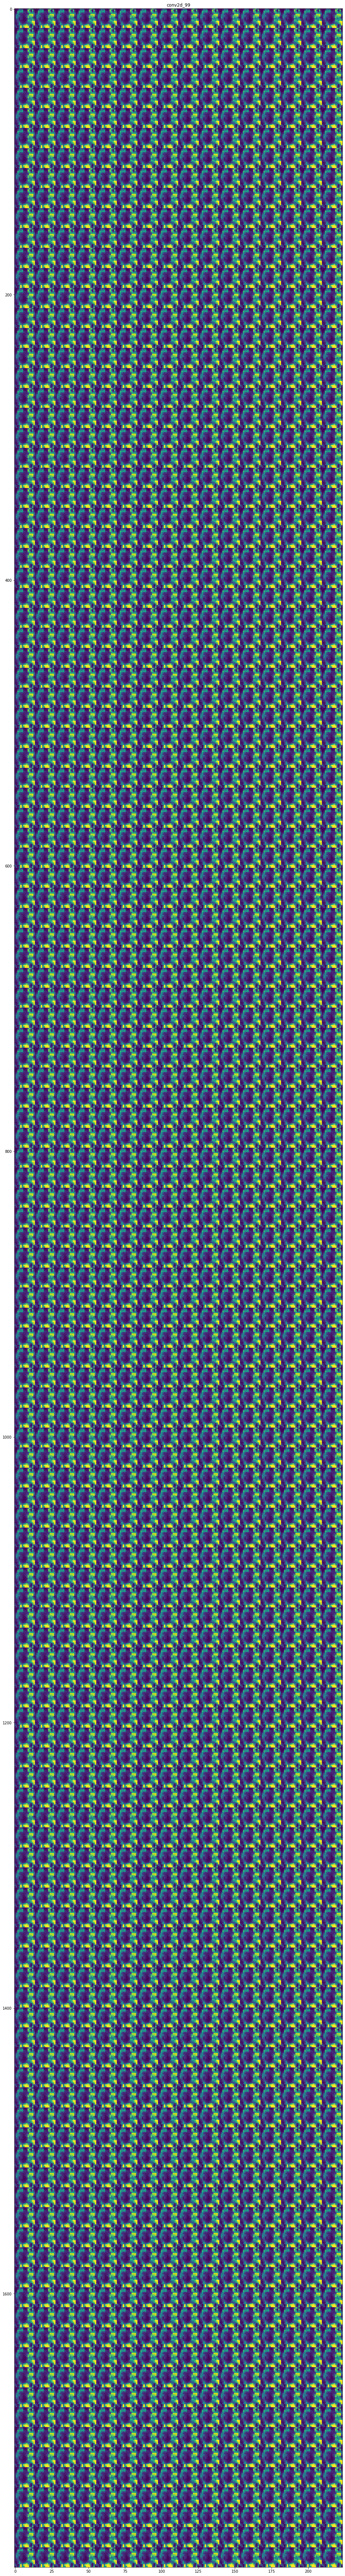

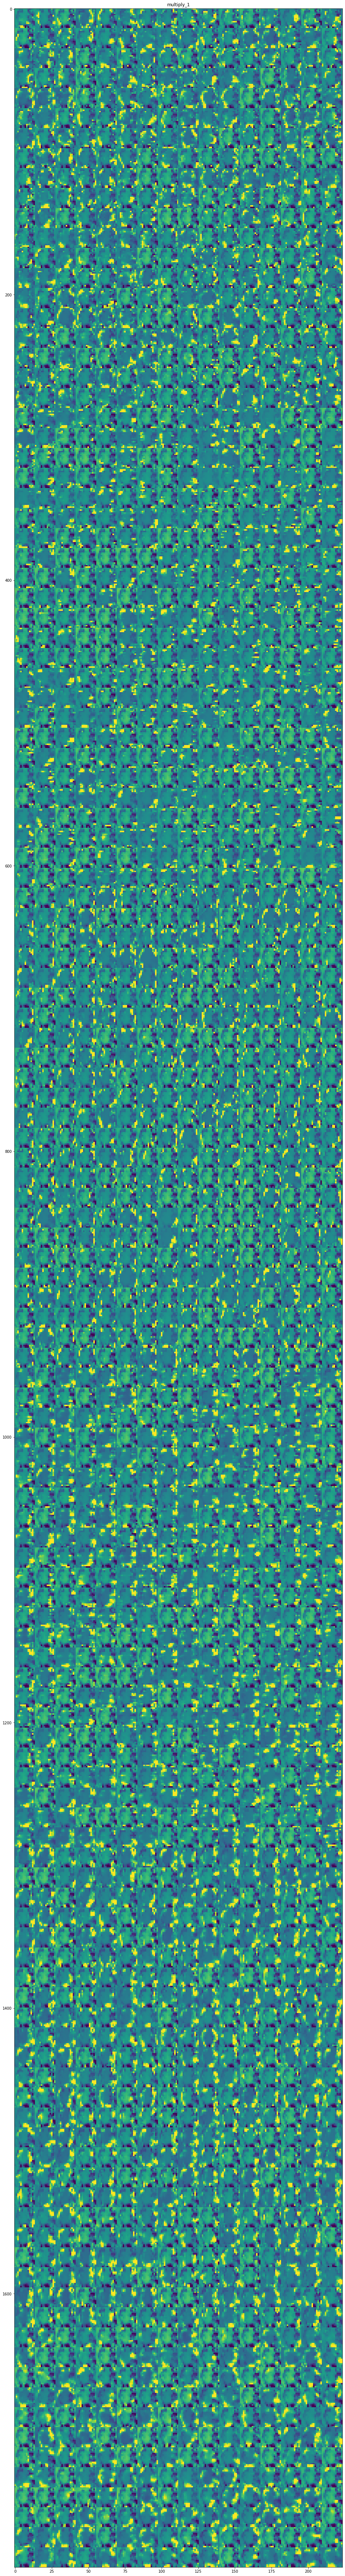

In [50]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[1:]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
#     plt.savefig(layer_name)
    
plt.show()

In [62]:
#Visualizing CNNs using deconvolutions

import argparse
import numpy as np
import sys
import time
from PIL import Image
from keras.layers import (
        Input,
        InputLayer,
        Flatten,
        Activation,
        Dense)
from keras.layers.convolutional import (
        Convolution2D,
        MaxPooling2D)
from keras.activations import *
from keras.models import Model
import keras.backend as K


class DInput(object):
    '''
    A class to define forward and backward operation on Input
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Input layer, whose configuration 
                   will be used to initiate DInput(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
    
    # input and output of Input layer are the same
    def up(self, data):
        '''
        function to operate input in forward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            data
        '''
        self.up_data = data
        return self.up_data
    
    def down(self, data):
        '''
        function to operate input in backward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            data
        '''
        self.down_data = data
        return self.down_data

class DConvolution2D(object):
    '''
    A class to define forward and backward operation on Convolution2D
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Convolution2D layer, whose configuration 
                   will be used to initiate DConvolution2D(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer

        
        weights = layer.get_weights()
        W, b = weights
        config = layer.get_config()

        # Set up_func for DConvolution2D
        input = Input(shape = layer.input_shape[1:])
        output = Convolution2D.from_config(config)(input)
        up_func = Model(input, output)
        up_func.layers[1].set_weights(weights)
        self.up_func = up_func
        
        # Flip W horizontally and vertically, 
        # and set down_func for DConvolution2D
        W = np.transpose(W, (0, 1, 3, 2))
        W = W[::-1, ::-1, :, :]
        config['filters'] = W.shape[3]
        config['kernel_size'] = (W.shape[0], W.shape[1])
        b = np.zeros(config['filters'])
        input = Input(shape = layer.output_shape[1:])
        output = Convolution2D.from_config(config)(input)
        down_func = Model(input, output)
        down_func.layers[1].set_weights((W, b))
        self.down_func = down_func
        
    def up(self, data):
        '''
        function to compute Convolution output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Convolved result
        '''
        self.up_data = self.up_func.predict(data)
        return self.up_data

    def down(self, data):
        '''
        function to compute Deconvolution output in backward pass
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            Deconvolved result
        '''
        self.down_data= self.down_func.predict(data)
        return self.down_data

class DPooling(object):
    '''
    A class to define forward and backward operation on Pooling
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Pooling layer, whose configuration 
                   will be used to initiate DPooling(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.poolsize = layer.pool_size
    
    def up(self, data):
        '''
        function to compute pooling output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Pooled result
        '''
        [self.up_data, self.switch] = \
                self.__max_pooling_with_switch(data, self.poolsize)
        return self.up_data

    def down(self, data):
        '''
        function to compute unpooling output in backward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Unpooled result
        '''
        self.down_data = self.__max_unpooling_with_switch(data, self.switch)
        return self.down_data
    
    def __max_pooling_with_switch(self, input, poolsize):
        '''
        Compute pooling output and switch in forward pass, switch stores 
        location of the maximum value in each poolsize * poolsize block
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
        # Returns
            Pooled result and Switch
        '''
        switch = np.zeros(input.shape)
        out_shape = list(input.shape)
        row_poolsize = int(poolsize[0])
        col_poolsize = int(poolsize[1])
        out_shape[1] = out_shape[1] // poolsize[0]
        out_shape[2] = out_shape[2] // poolsize[1]
        pooled = np.zeros(out_shape)
        
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                for row in range(out_shape[1]):
                    for col in range(out_shape[2]):
                        patch = input[sample, 
                                row * row_poolsize : (row + 1) * row_poolsize,
                                col * col_poolsize : (col + 1) * col_poolsize,
                                dim]
                        max_value = patch.max()
                        pooled[sample, row, col, dim] = max_value
                        max_col_index = patch.argmax(axis = -1)
                        max_cols = patch.max(axis = -1)
                        max_row = max_cols.argmax()
                        max_col = max_col_index[max_row]
                        switch[sample, 
                                row * row_poolsize + max_row, 
                                col * col_poolsize + max_col,
                              dim]  = 1
        return [pooled, switch]
    
    # Compute unpooled output using pooled data and switch
    def __max_unpooling_with_switch(self, input, switch):
        '''
        Compute unpooled output using pooled data and switch
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
            switch: switch storing location of each elements
        # Returns
            Unpooled result
        '''
        out_shape = switch.shape
        unpooled = np.zeros(out_shape)
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                tile = np.ones((switch.shape[1] // input.shape[1], 
                    switch.shape[2] // input.shape[2]))
                out = np.kron(input[sample, :, :, dim], tile)
                unpooled[sample, :, :, dim] = out * switch[sample, :, :, dim]
        return unpooled


class DActivation(object):
    '''
    A class to define forward and backward operation on Activation
    '''
    def __init__(self, layer, linear = False):
        '''
        # Arguments
            layer: an instance of Activation layer, whose configuration 
                   will be used to initiate DActivation(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.linear = linear
        self.activation = layer.activation
        input = K.placeholder(shape = layer.output_shape)

        output = self.activation(input)
        # According to the original paper, 
        # In forward pass and backward pass, do the same activation(relu)
        self.up_func = K.function(
                [input, K.learning_phase()], [output])
        self.down_func = K.function(
                [input, K.learning_phase()], [output])

    # Compute activation in forward pass
    def up(self, data, learning_phase = 0):
        '''
        function to compute activation in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.up_data = self.up_func([data, learning_phase])[0]
        return self.up_data

    # Compute activation in backward pass
    def down(self, data, learning_phase = 0):
        '''
        function to compute activation in backward pass
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.down_data = self.down_func([data, learning_phase])[0]
        return self.down_data
    
class DDense(object):
    '''
    A class to define forward and backward operation on Dense
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Dense layer, whose configuration 
                   will be used to initiate DDense(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        weights = layer.get_weights()
        W, b = weights
        config = layer.get_config()
        
        #Set up_func for DDense
        input = Input(shape = layer.input_shape[1:])
        output = Dense.from_config(config)(input)
        up_func = Model(input, output)
        up_func.set_weights(weights)
        self.up_func = up_func
        
        #Transpose W and set down_func for DDense
        W = W.transpose()
        self.input_shape = layer.input_shape
        self.output_shape = layer.output_shape
        b = np.zeros(self.input_shape[1])
        flipped_weights = [W, b]
        input = Input(shape = self.output_shape[1:])
        output = Dense(units = self.input_shape[1])(input)
        down_func = Model(input, output)
        down_func.set_weights(flipped_weights)
        self.down_func = down_func
    

    def up(self, data):
        '''
        function to compute dense output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Result of dense layer
        '''
        self.up_data = self.up_func.predict(data)
        return self.up_data
        
    def down(self, data):
        '''
        function to compute dense output in backward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Result of reverse dense layer
        '''
        # data = data - self.bias
        self.down_data = self.down_func.predict(data)
        return self.down_data
    
class DFlatten(object):
    '''
    A class to define forward and backward operation on Flatten
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Flatten layer, whose configuration 
                   will be used to initiate DFlatten(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.shape = layer.input_shape[1:]
        self.up_func = K.function(
                [layer.input, K.learning_phase()], [layer.output])

    # Flatten 2D input into 1D output
    def up(self, data, learning_phase = 0):
        '''
        function to flatten input in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Flattened data
        '''
        self.up_data = self.up_func([data, learning_phase])[0]
        return self.up_data

    # Reshape 1D input into 2D output
    def down(self, data):
        '''
        function to unflatten input in backward pass
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            Recovered data
        '''
        new_shape = [data.shape[0]] + list(self.shape)
        assert np.prod(self.shape) == np.prod(data.shape[1:])
        self.down_data = np.reshape(data, new_shape)
        return self.down_data

In [99]:
def find_top_filters(output, top=4):
    filter_sum = []
    for filter_index in range(output.shape[-1]):
        if output.ndim == 2:
            sum_value = np.sum(output[:, filter_index])
        else:
            sum_value = np.sum(output[:, :, :, filter_index])
        if sum_value > 0:
            filter_sum.append((filter_index, sum_value))
    filter_sum.sort(key=lambda x: x[1], reverse=True)
    return filter_sum[:top]

def visualize_all_layers(model, data, layer_name='predictions', visualize_mode='all'):
    '''
    function to visualize feature
    # Arguments
        model: Pre-trained model used to visualize data
        data: image to visualize
        layer_name: Name of layer to visualize
        feature_to_visualize: Features to visualize
        visualize_mode: Visualize mode, 'all' or 'max', 'max' will only pick 
                        the greates activation in a feature map and set others
                        to 0s, this will indicate which part fire the neuron 
                        most; 'all' will use all values in a feature map,
                        which will show what image the filter sees. For 
                        convolutional layers, There is difference between 
                        'all' and 'max', for Dense layer, they are the same
    # Returns
        The image reflecting feature
    '''
    deconv_layers = []
    # Stack layers
    for layer in model.layers:
        if isinstance(layer, Convolution2D):
            deconv_layers.append((layer.name, DConvolution2D(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, MaxPooling2D):
            deconv_layers.append((layer.name, DPooling(layer)))
        elif isinstance(layer, Dense):
            deconv_layers.append((layer.name, DDense(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, Activation):
            deconv_layers.append((layer.name, DActivation(layer)))
        elif isinstance(layer, Flatten):
            deconv_layers.append((layer.name, DFlatten(layer)))
        elif isinstance(layer, InputLayer):
            deconv_layers.append((layer.name, DInput(layer)))
        else:
            print('Cannot handle this type of layer', layer.name)
#             print(layer.get_config())
#             sys.exit()
            continue
        if layer_name == layer.name:
            print ('Got layer', layer_name)
            break

    # Forward pass
    deconv_layers[0][1].up(data)
    for i in range(1, len(deconv_layers)):
        deconv_layers[i][1].up(deconv_layers[i - 1][1].up_data)
        
    # Selecting layers to visualize
    layers_to_visualize = []
    model_layers = set([layer.name for layer in model.layers])
    layers_to_visualize = [x for x, y in enumerate(deconv_layers) 
                           if y[0] in model_layers]
    layers_to_visualize.reverse()
    # Removing the input layer
    layers_to_visualize.pop()
    print('layers_to_visualize:', layers_to_visualize)
    
    deconv_dict = dict()
    for i in layers_to_visualize:
        deconv_list = []
        output = deconv_layers[i][1].up_data
        top_filters = find_top_filters(output)
        print('output.shape :', output.shape)
        print('deconv_layer:', deconv_layers[i][0])
        print('top_filters:', top_filters)
        for feature_to_visualize, sum_value in top_filters:
            assert output.ndim == 2 or output.ndim == 4
            if output.ndim == 2:
                feature_map = output[:, feature_to_visualize]
            else:
                feature_map = output[:, :, :, feature_to_visualize]
            if 'max' == visualize_mode:
                max_activation = feature_map.max()
                temp = feature_map == max_activation
                feature_map = feature_map * temp
            elif 'all' != visualize_mode:
                print('Illegal visualize mode')
                sys.exit()
            output_temp = np.zeros_like(output)
            if 2 == output.ndim:
                output_temp[:, feature_to_visualize] = feature_map
            else:
                output_temp[:, :, :, feature_to_visualize] = feature_map

            # Backward pass
            deconv_layers[i][1].down(output_temp)
            for j in range(i - 1, -1, -1):
                deconv_layers[j][1].down(deconv_layers[j + 1][1].down_data)
            deconv = deconv_layers[0][1].down_data
            deconv = deconv.squeeze()
            deconv_list.append(deconv)
        deconv_dict[deconv_layers[i][0]] = deconv_list
    
    return deconv_dict

In [68]:
from IPython.display import display, HTML
from keras.utils import plot_model

def plot_model_architecture(base_model, model_name):
    plot_model(base_model, show_shapes=True, to_file=model_name)
    display(HTML('<img src="{}" style="display:inline;margin:1px"/>'.format(model_name)))

In [70]:
# from keras.preprocessing import image
# # from keras.applications import vgg16
# import keras.backend as K
# K.set_image_data_format('channels_last')

# plot_model_architecture(model, 'vgg16_channel_last.svg')

In [71]:
for layer in model.layers:
    print(layer.name, layer)

input_1 <keras.engine.input_layer.InputLayer object at 0x174061890>
inception_v3 <keras.engine.training.Model object at 0x174061a50>
batch_normalization_95 <keras.layers.normalization.BatchNormalization object at 0x174061750>
dropout_1 <keras.layers.core.Dropout object at 0x174061c50>
conv2d_95 <keras.layers.convolutional.Conv2D object at 0x17bcaaed0>
conv2d_96 <keras.layers.convolutional.Conv2D object at 0x17bcb70d0>
conv2d_97 <keras.layers.convolutional.Conv2D object at 0x17bcb72d0>
conv2d_98 <keras.layers.convolutional.Conv2D object at 0x17bcb7550>
conv2d_99 <keras.layers.convolutional.Conv2D object at 0x17bcb75d0>
multiply_1 <keras.layers.merge.Multiply object at 0x17bcb77d0>
global_average_pooling2d_1 <keras.layers.pooling.GlobalAveragePooling2D object at 0x17bcb7990>
global_average_pooling2d_2 <keras.layers.pooling.GlobalAveragePooling2D object at 0x17bcb7950>
RescaleGAP <keras.layers.core.Lambda object at 0x174061e50>
dropout_2 <keras.layers.core.Dropout object at 0x17bcb7b90>
d

In [74]:
# from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_v3 import preprocess_input
in_array = np.expand_dims(image.img_to_array(
           image.load_img(img_path, target_size=(512, 512))), axis=0)
img_array = preprocess_input(in_array)


In [100]:
deconv = visualize_all_layers(model, img_array, layer_name='dense_2', visualize_mode='max')


Got layer dense_2


ValueError: Error when checking input: expected input_32 to have 2 dimensions, but got array with shape (1, 512, 512, 3)

In [76]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

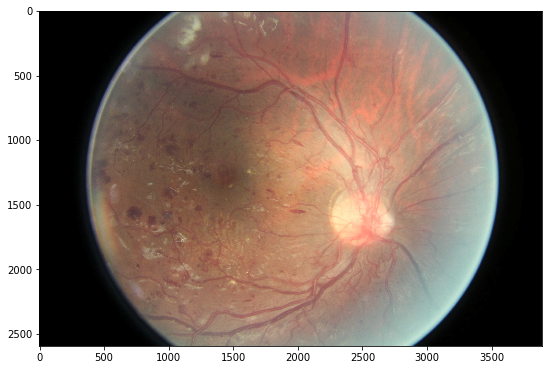

In [77]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

plt.figure(figsize=(9, 9))
plt.imshow(image.img_to_array(image.load_img(img_path)) / 255.)

In [78]:
for key in deconv.keys():
    print(key)

NameError: name 'deconv' is not defined

In [103]:
#heatmaps of class activation

from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'sample/16_left.jpeg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(512, 512))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [104]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 5)

In [105]:
preds.shape

(1, 5)

In [106]:
np.argmax(preds[0])

2

In [115]:
layer_names = ['conv2d_95', 'conv2d_96', 'conv2d_97', 'conv2d_98', 'conv2d_99']

In [116]:
pred_vector_output = model.output[:, 2]

heatmap = []
for layer_name in layer_names:
    # The is the output feature map of the given layer, in VGG16
    some_conv_layer = model.get_layer(layer_name)

    # This is the gradient of the predicted class with regard to
    # the output feature map of selected block
    grads = K.gradients(pred_vector_output, some_conv_layer.output)[0]

    # This is a vector of shape (512,), where each entry
    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `block5_conv3`,
    # given a sample image
    iterate = K.function([model.input], [pooled_grads, some_conv_layer.output[0]])

    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of two elephants
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the elephant class
    for i in range(model.get_layer(layer_name).output_shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap.append(np.mean(conv_layer_output_value, axis=-1))

In [117]:
len(heatmap)

5

In [118]:
from matplotlib import pyplot as plt
%matplotlib inline

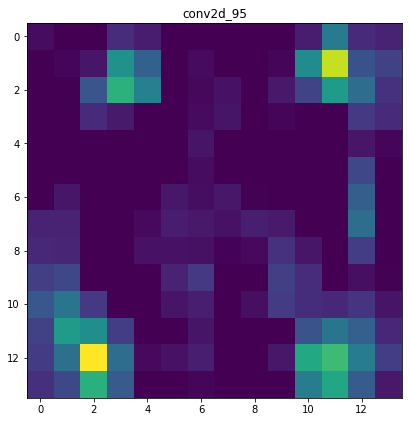

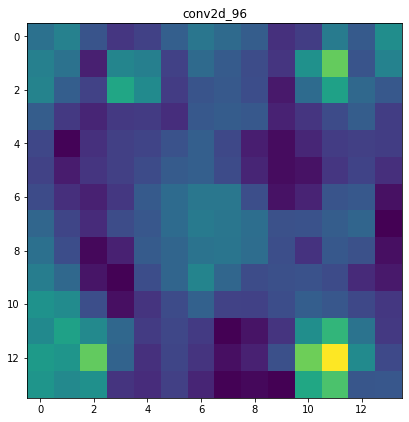

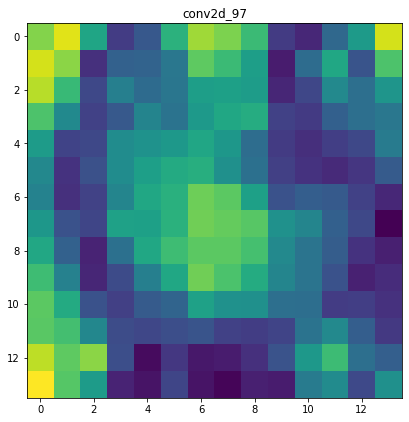

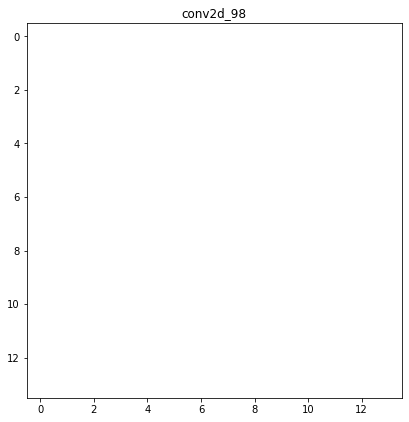

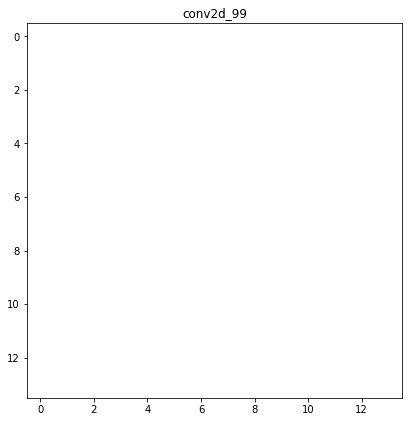

In [125]:
# np.seterr(divide='ignore', invalid='ignore')
for i in range(5):
    plt.figure(figsize=(40,40))
    plt.subplot(5, 3, i+1)
    img_heatmap = np.maximum(heatmap[i], 0)
    img_heatmap /= np.max(img_heatmap)
    plt.imshow(img_heatmap)
    plt.title(layer_names[i])
    plt.show()

In [128]:
import cv2
# We use cv2 to load the original image
img = cv2.imread(img_path)
for i, hm in enumerate(heatmap):
    img_heatmap = np.maximum(hm, 0)
    img_heatmap /= np.max(img_heatmap)
    
    # We resize the heatmap to have the same size as the original image
    img_hm = cv2.resize(img_heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    img_hm = np.uint8(255 * img_hm)

    # We apply the heatmap to the original image
    img_hm = cv2.applyColorMap(img_hm, cv2.COLORMAP_JET)

    # 0.4 here is a heatmap intensity factor
    superimposed_img = img_hm * 0.4 + img

    # Save the image to disk
    cv2.imwrite('./16_left_{}.jpg'.format(layer_names[i]), superimposed_img)

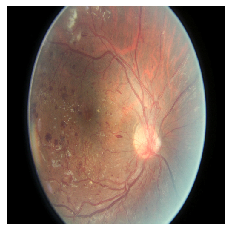

In [129]:
# https://github.com/hovinh/DeCNN/blob/master/experiments.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# image downloaded from: https://www.pexels.com/photo/animal-big-elephant-endangered-133394/
# preprocess the input before feeding into the network
img = image.load_img('sample/16_left.jpeg', target_size=(512, 512))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img); plt.axis('off'); plt.show()

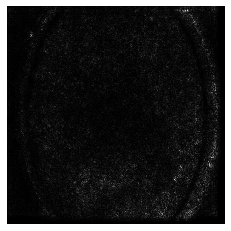

In [157]:
from backprop import Backpropagation

# masking is for selecting which unit to be mapped back
preds = model.predict(x)
masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

bp = Backpropagation(model=model, 
                           layer_name='dense_2',
                           input_data=x,
                           masking=masking)
heatmap, _ = bp.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

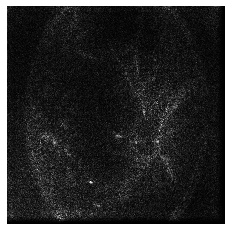

In [158]:
from backprop import SmoothGrad

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

smoothgrad = SmoothGrad(model=model, 
                           layer_name='dense_2',
                           input_data=x,
                           masking=masking)
heatmap  = smoothgrad.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

In [194]:
from importlib import reload  
reload(backprop)
import backprop
from backprop import GuidedBackprop

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

guidedbackprop = GuidedBackprop(model=model, 
                           layer_name='dense_2',
                           input_data=x,
                           masking=masking)
heatmap  = guidedbackprop.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

# GuidedBackprop??

working4
16
<class 'numpy.ndarray'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'NoneType'> <class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'> <class 'numpy.ndarray'>


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [192]:
from backprop import DeconvNet

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

deconvnet = DeconvNet(model=model, 
                           layer_name='dense_2',
                           input_data=x,
                           masking=masking)
heatmap  = deconvnet.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

NameError: name 'e' is not defined